In [1]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('tictac_genes_disease_associations2.csv')
# Filter and print rows with a mean_rank_score of 100
filtered_df = df[df['mean_rank_score'] == 100]

In [2]:
filtered_df.columns

Index(['disease_name', 'tcrdTargetName', 'doid', 'gene_symbol',
       'unique_drugs_count', 'disease-target', 'nStudy', 'nStudy_Weighted',
       'nPub', 'publication_type', 't_sum', 'nPub_Weighted', 'nDiseaseMention',
       'nDrugMention', 'Rank', 'rank_nStudy_Weighted', 'rank_nPub_Weighted',
       'rank_nDiseaseMention', 'rank_nDrugMention', 'mean_rank',
       'mean_rank_score'],
      dtype='object')

/tmp/ipykernel_1130556/3894342532.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['disease_name'] = filtered_df['disease_name'].astype(str)


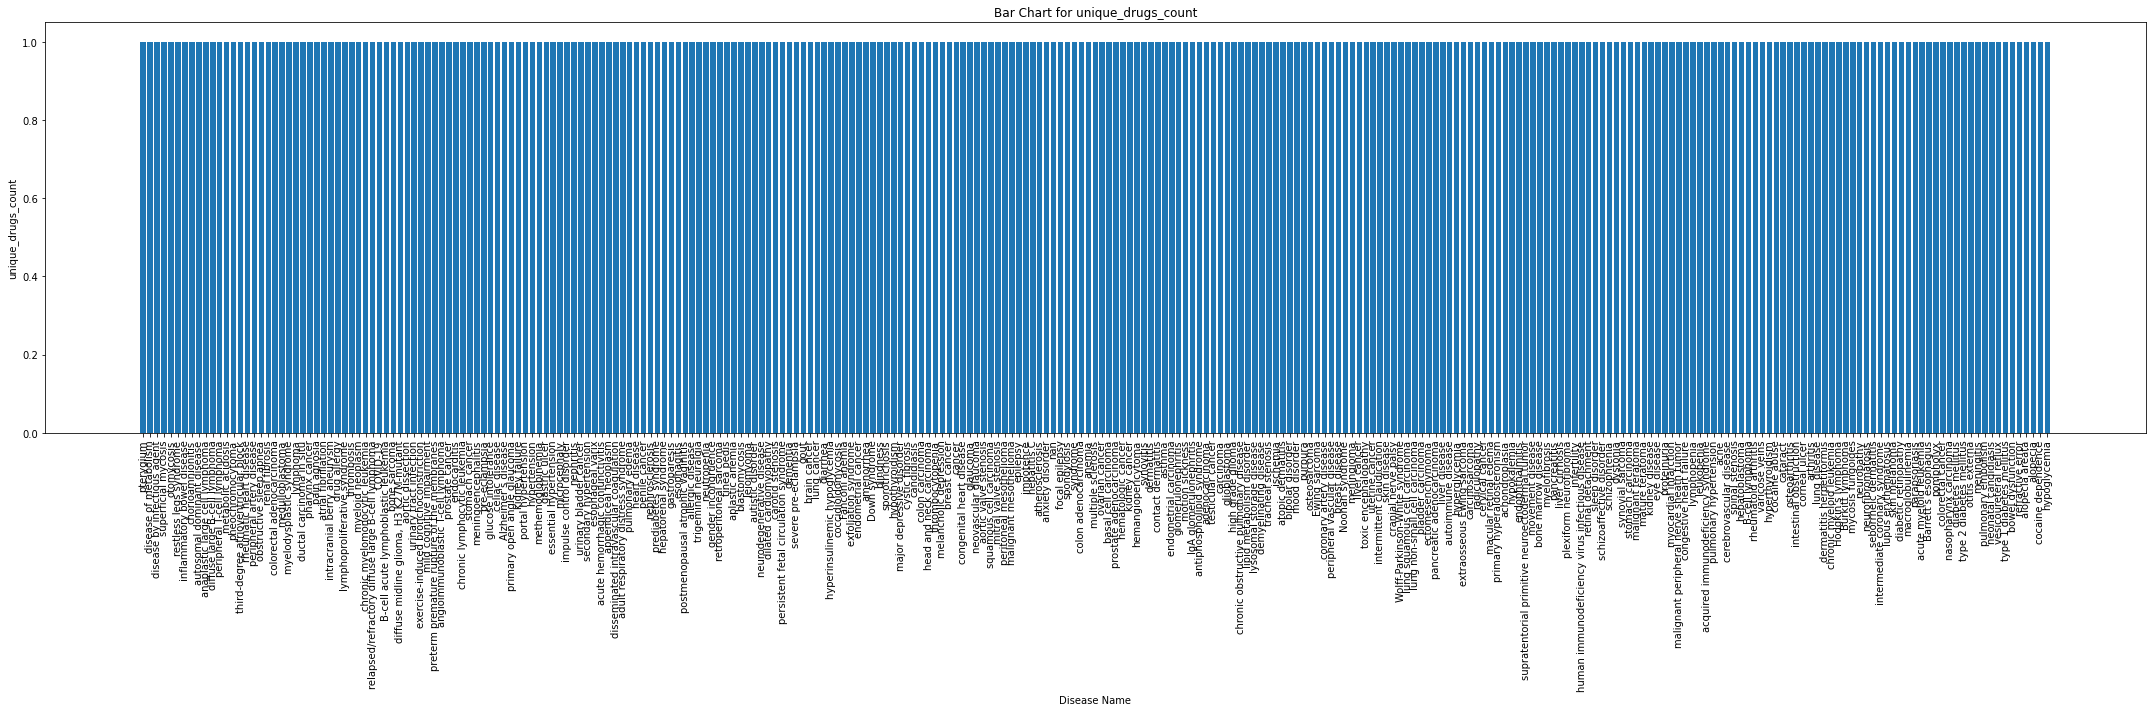

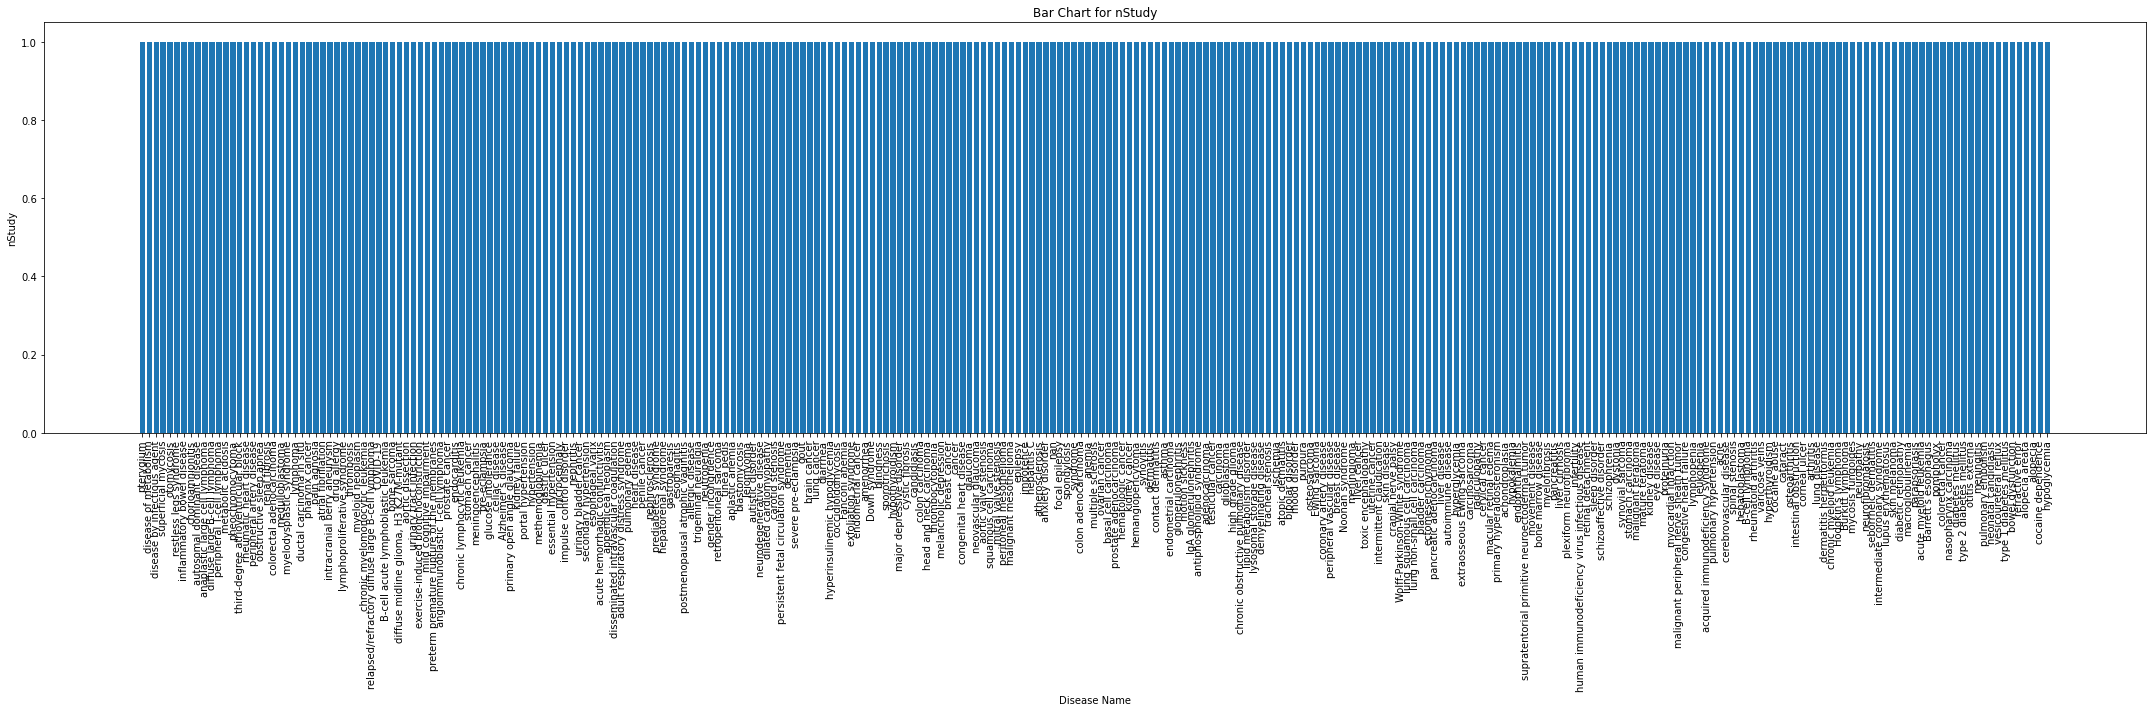

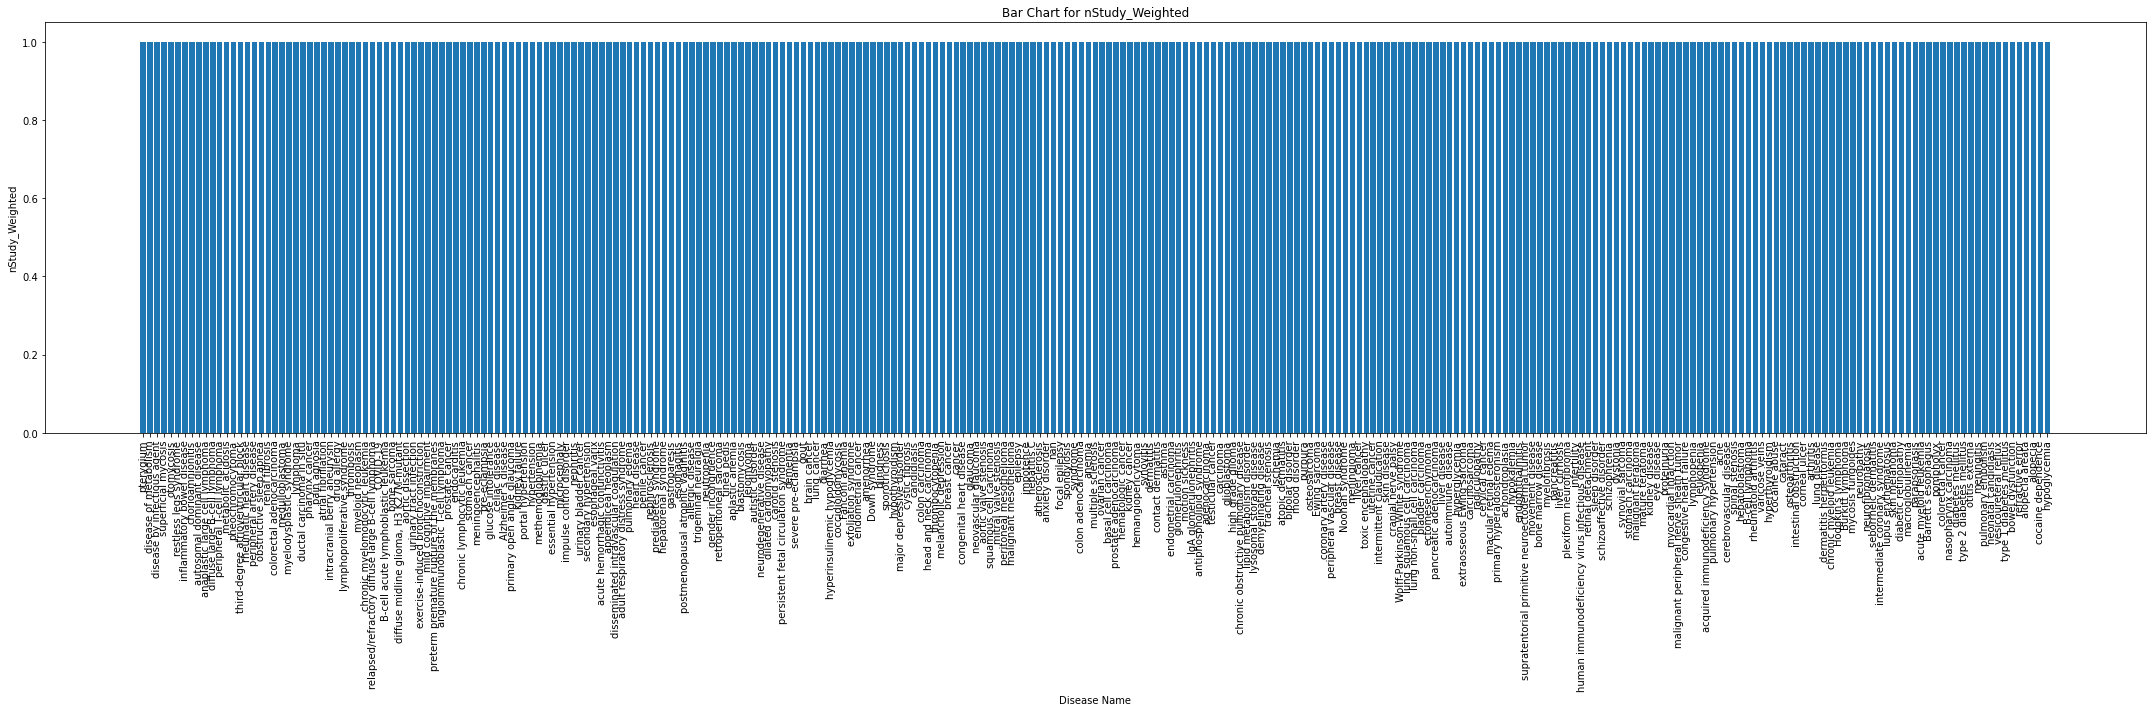

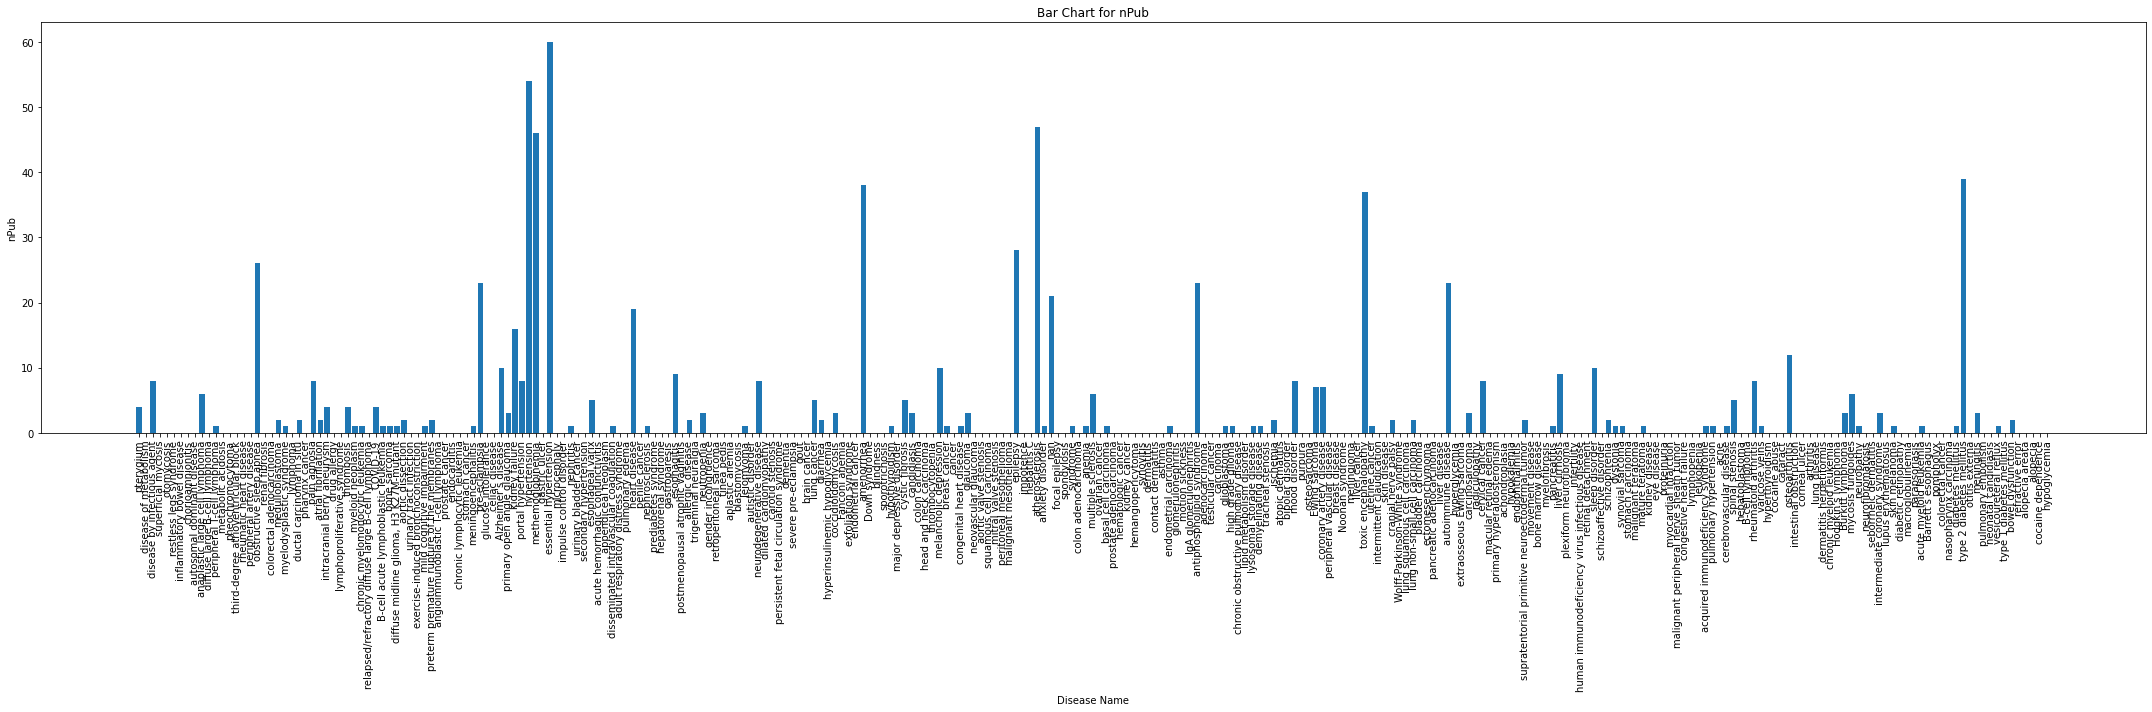

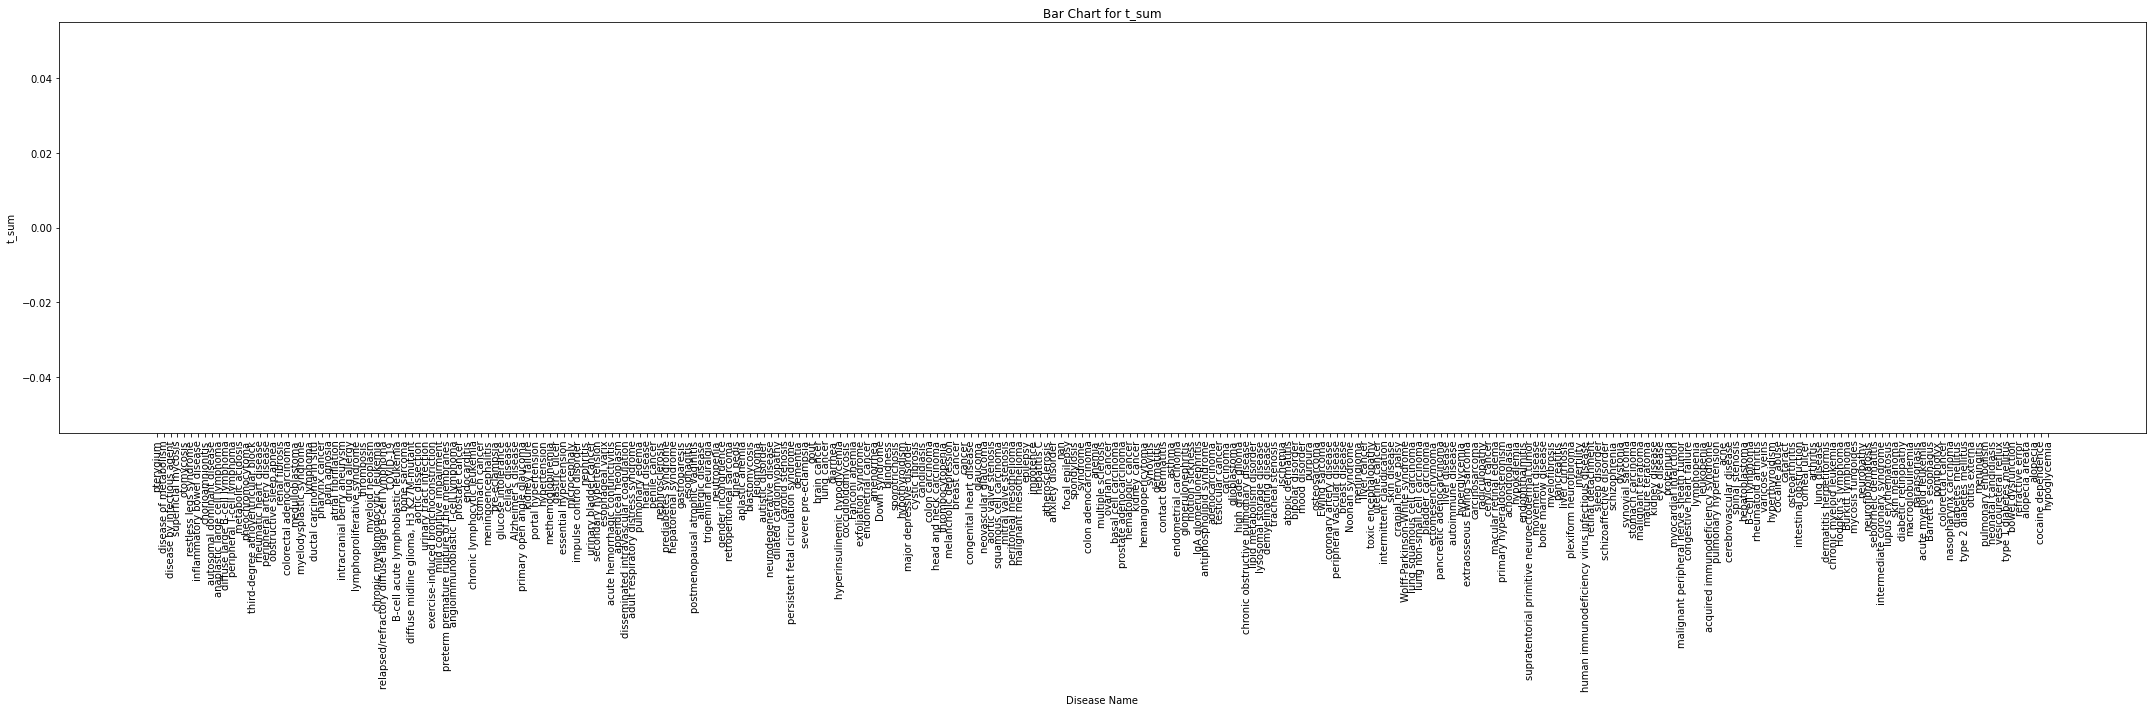

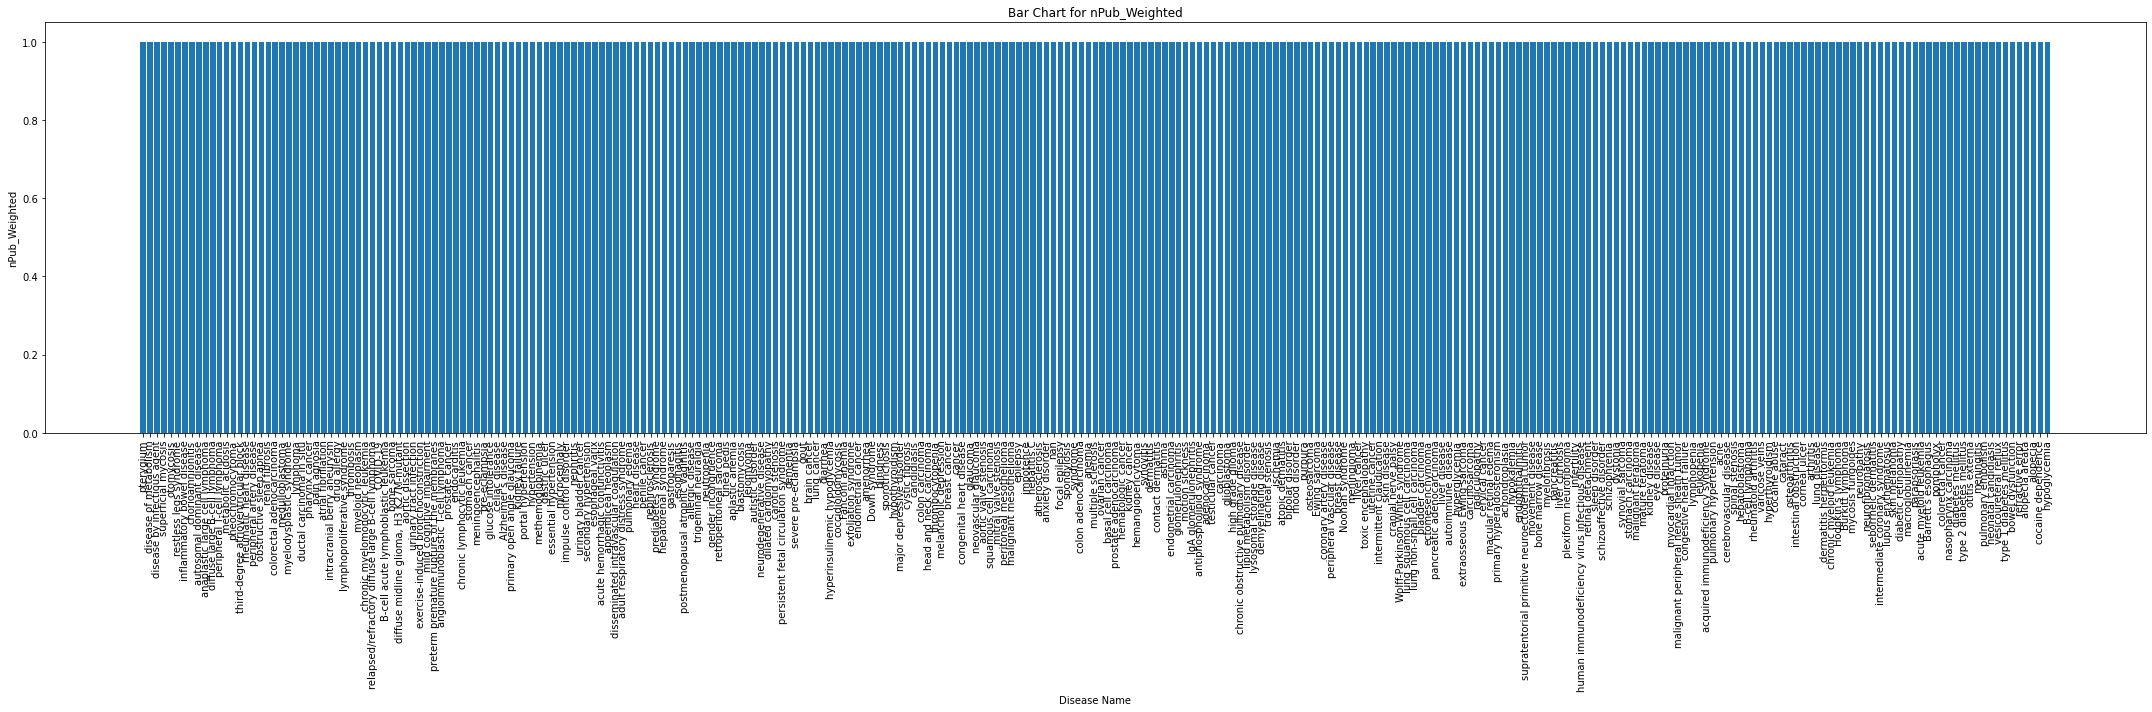

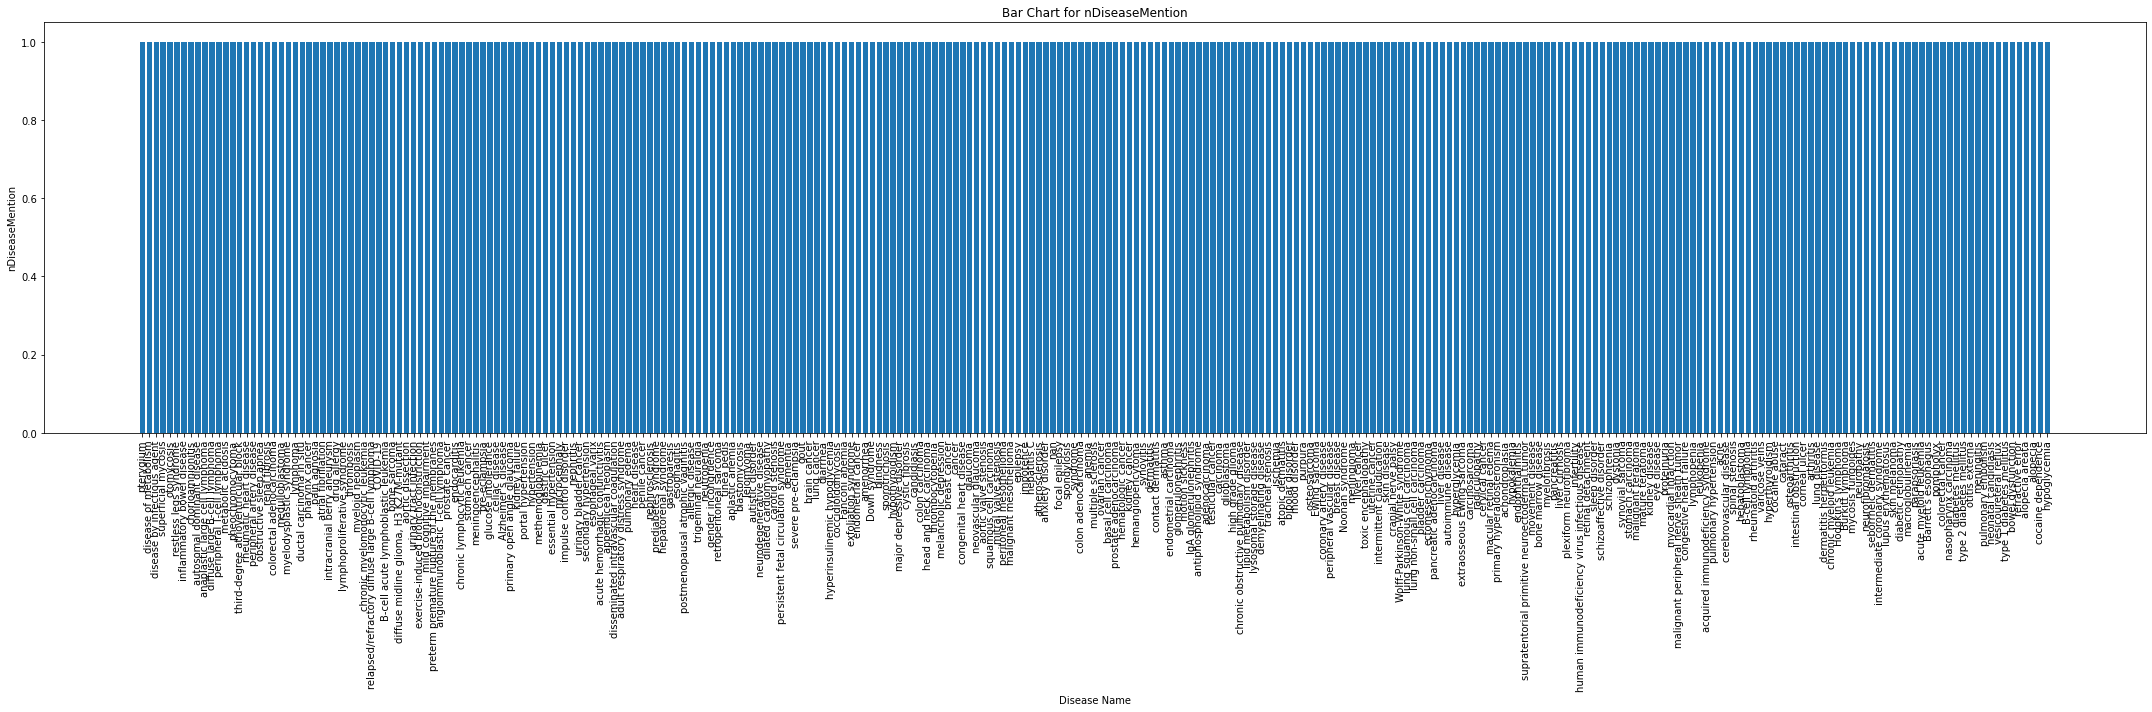

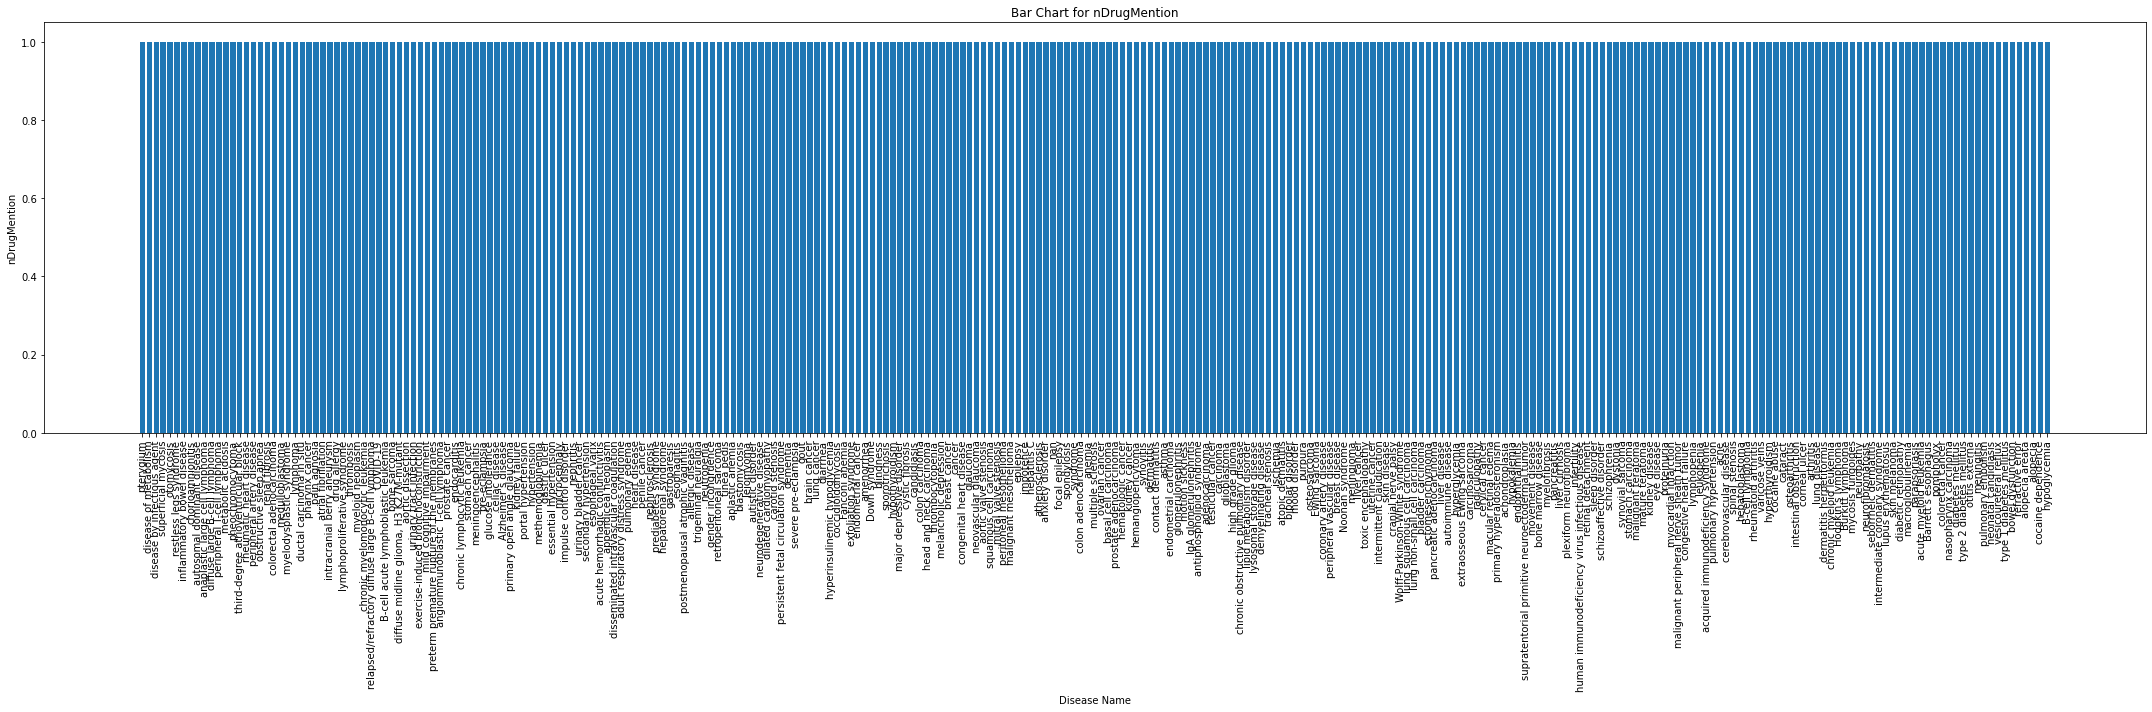

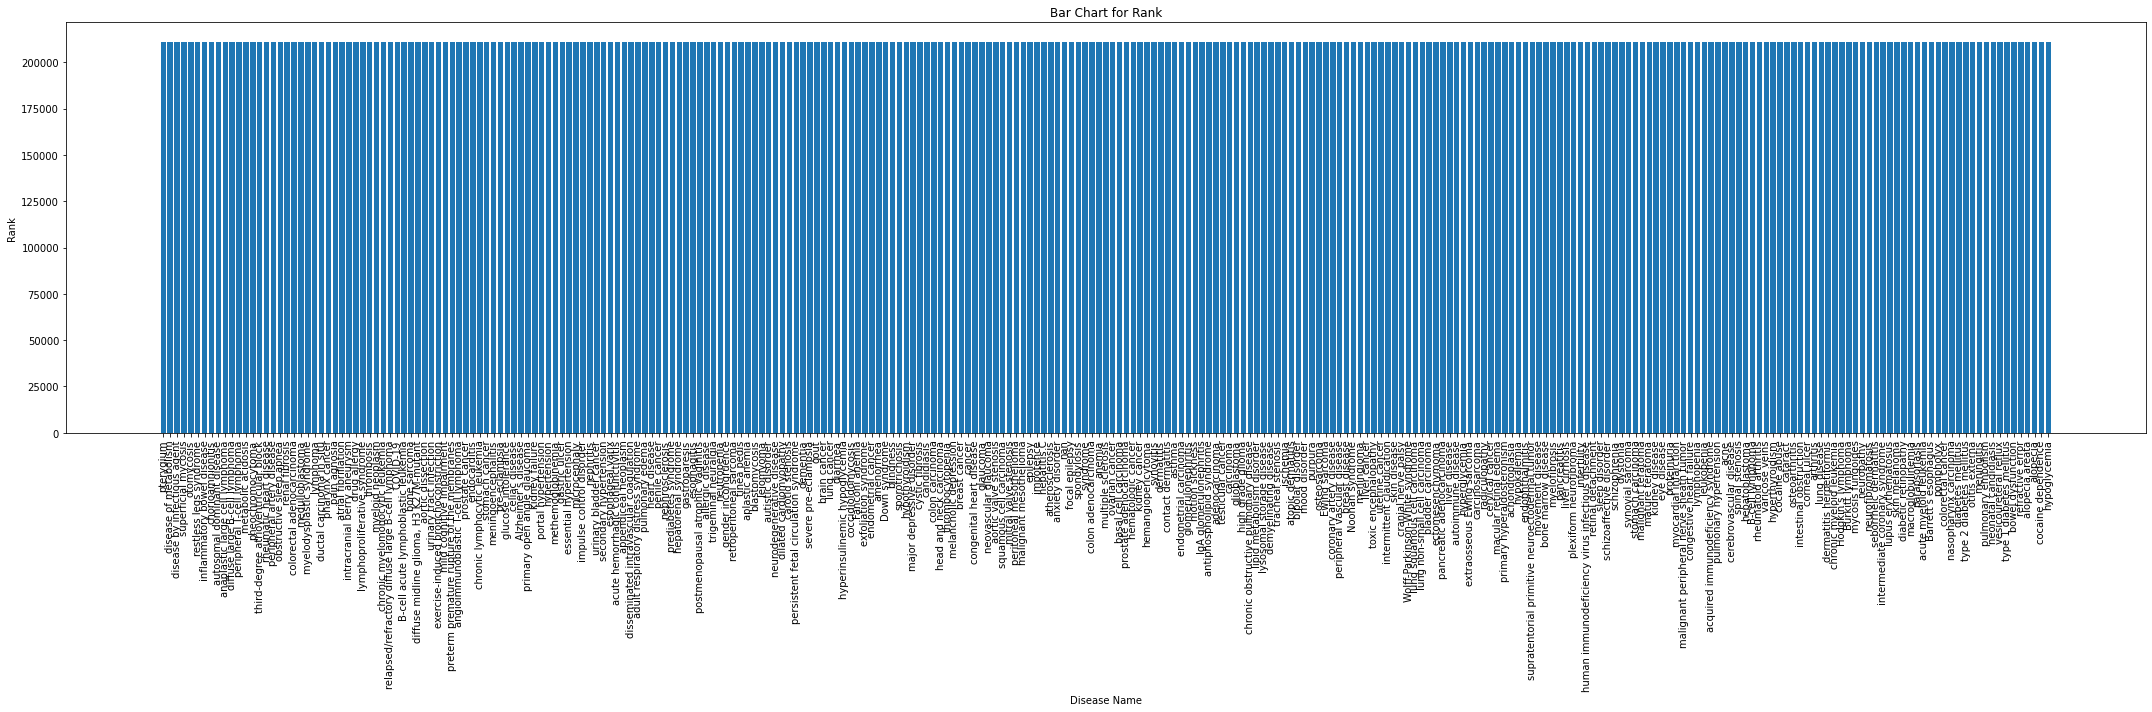

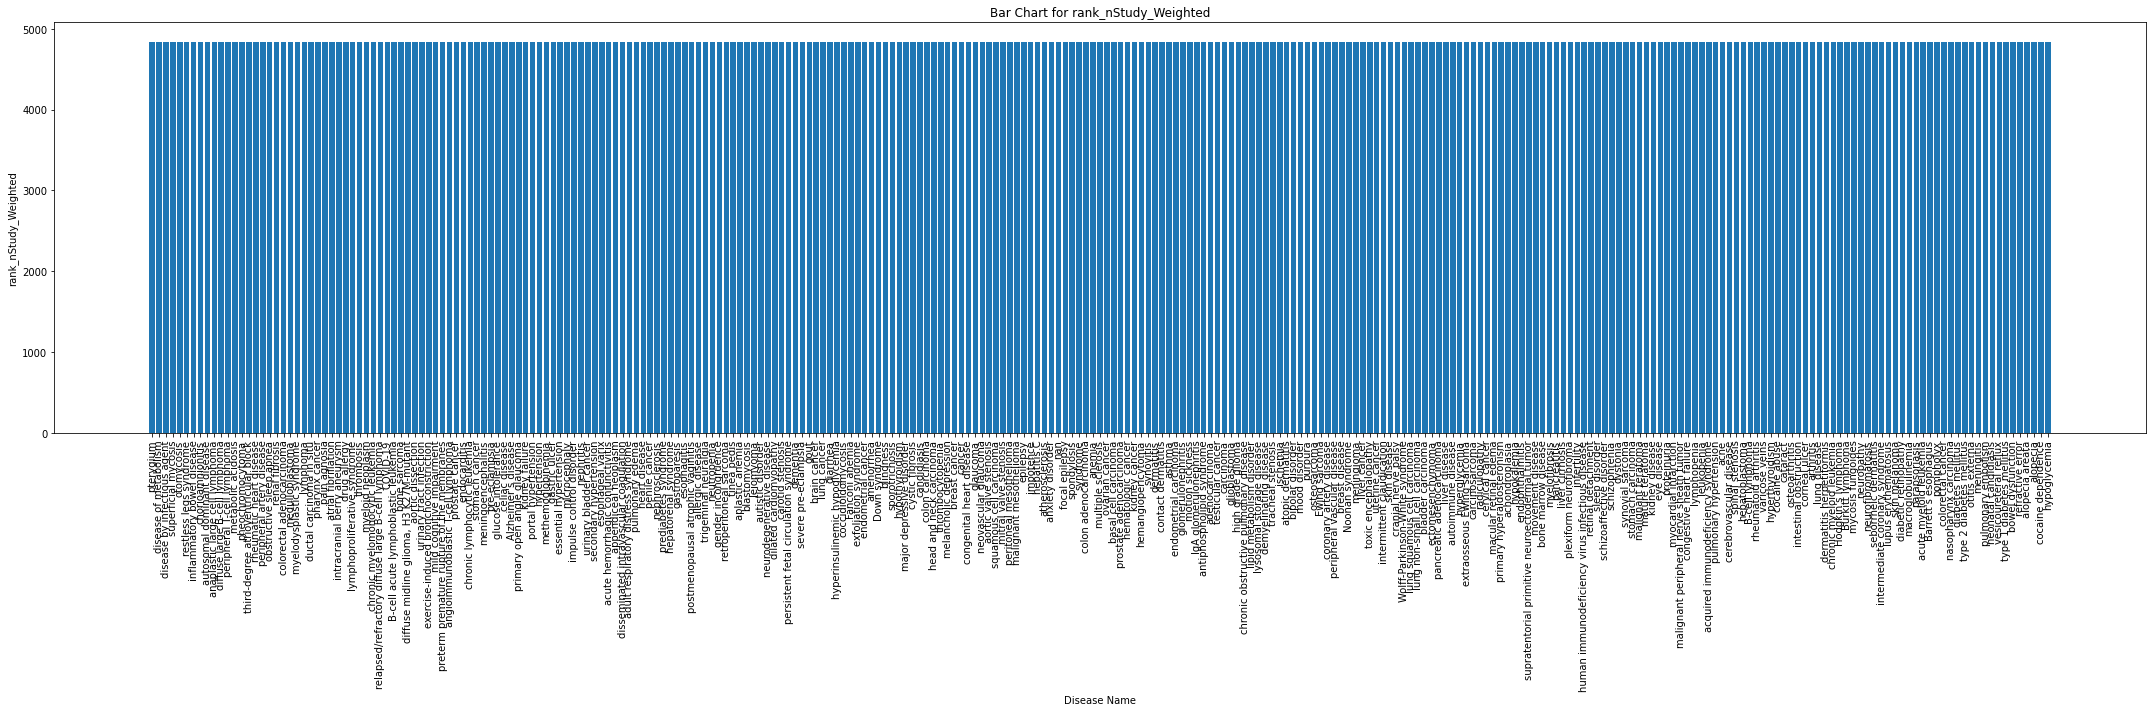

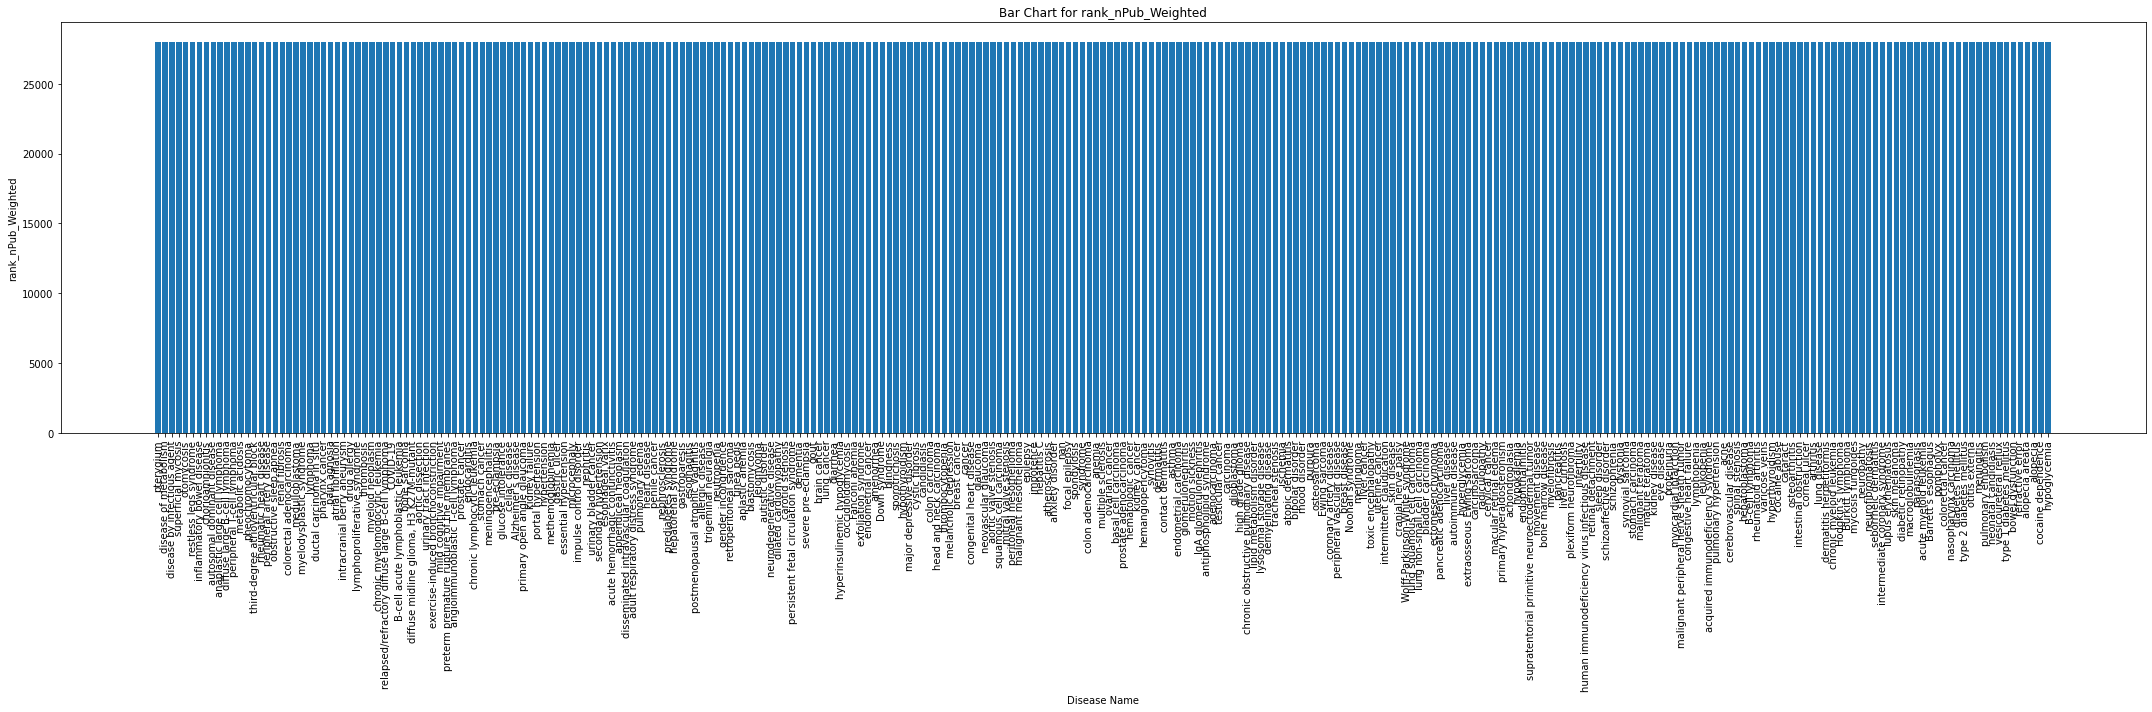

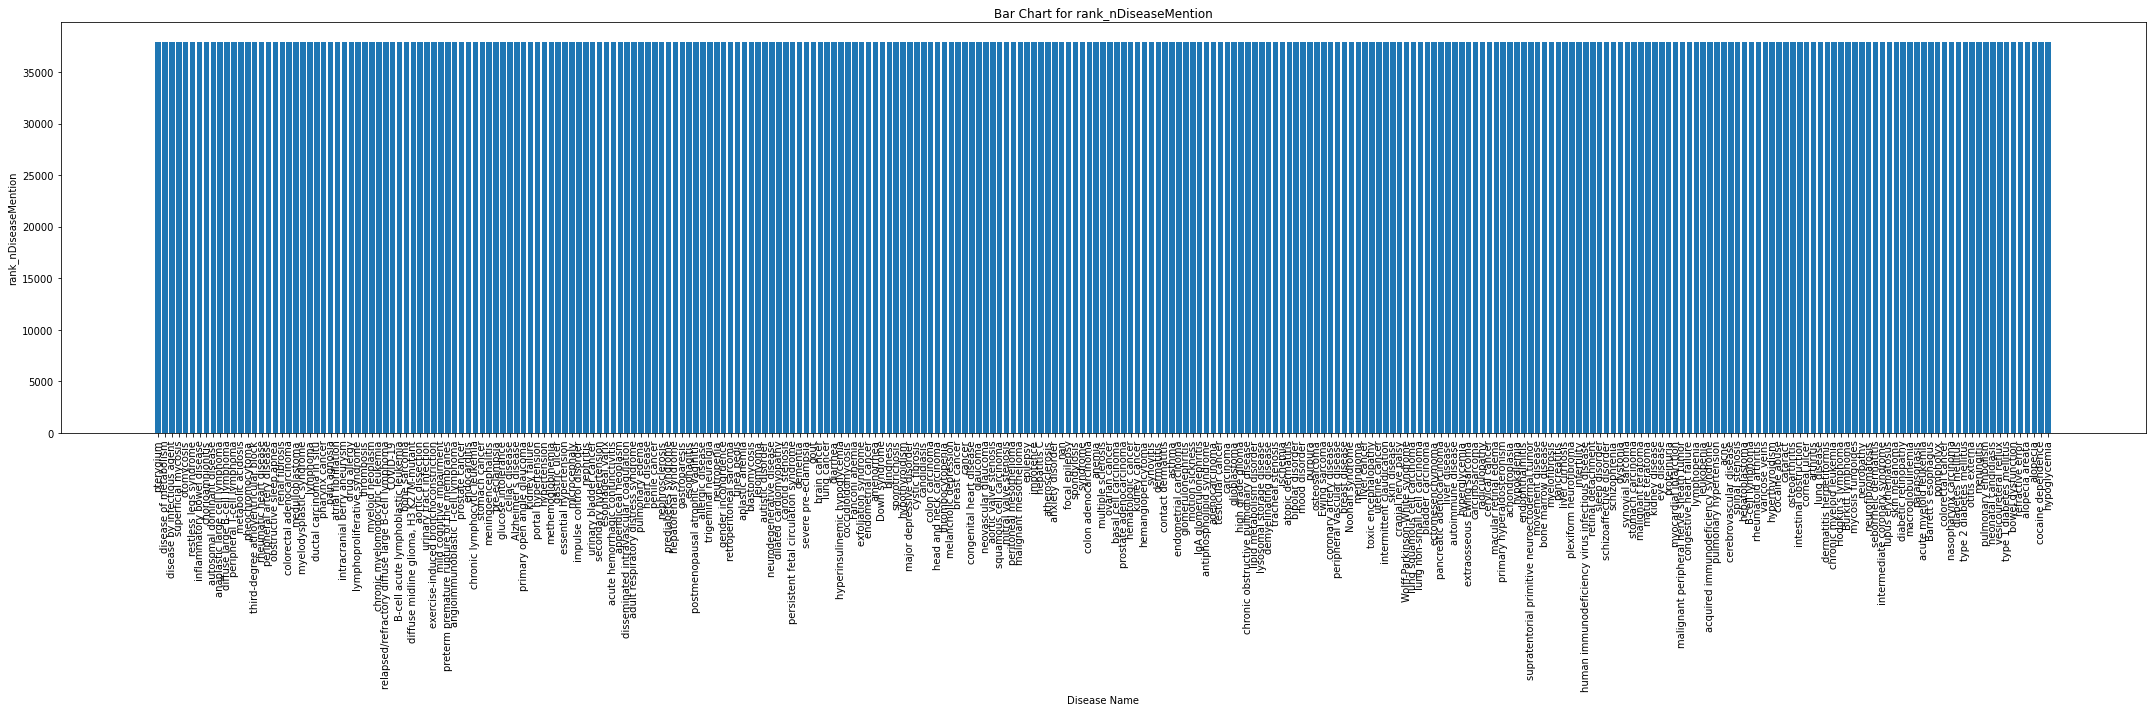

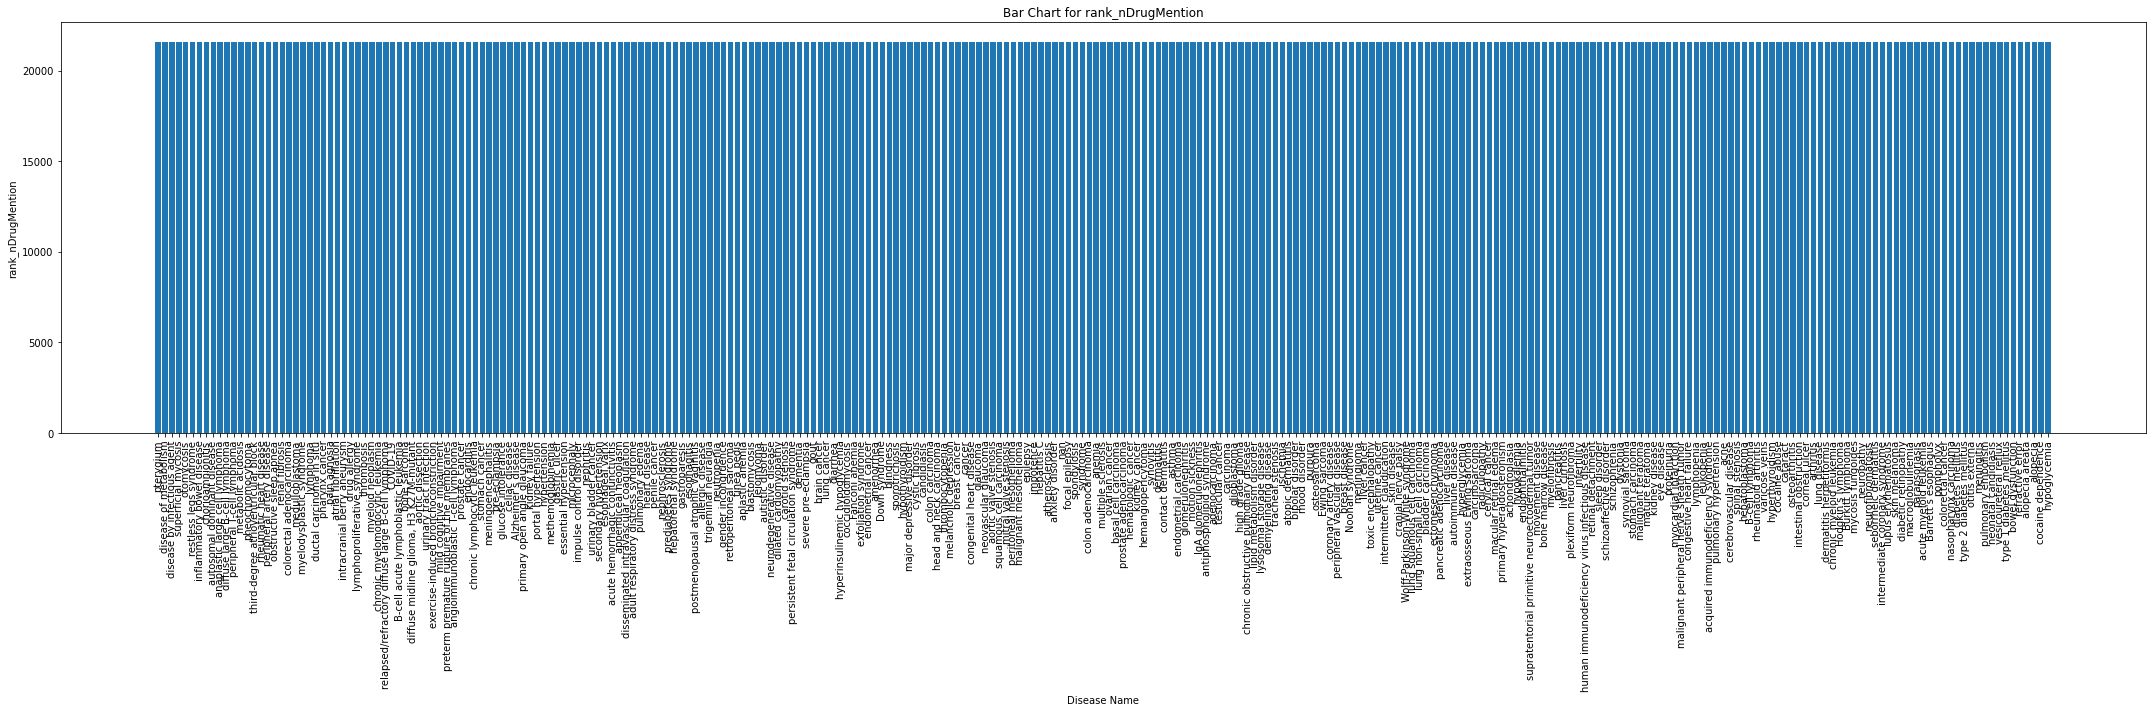

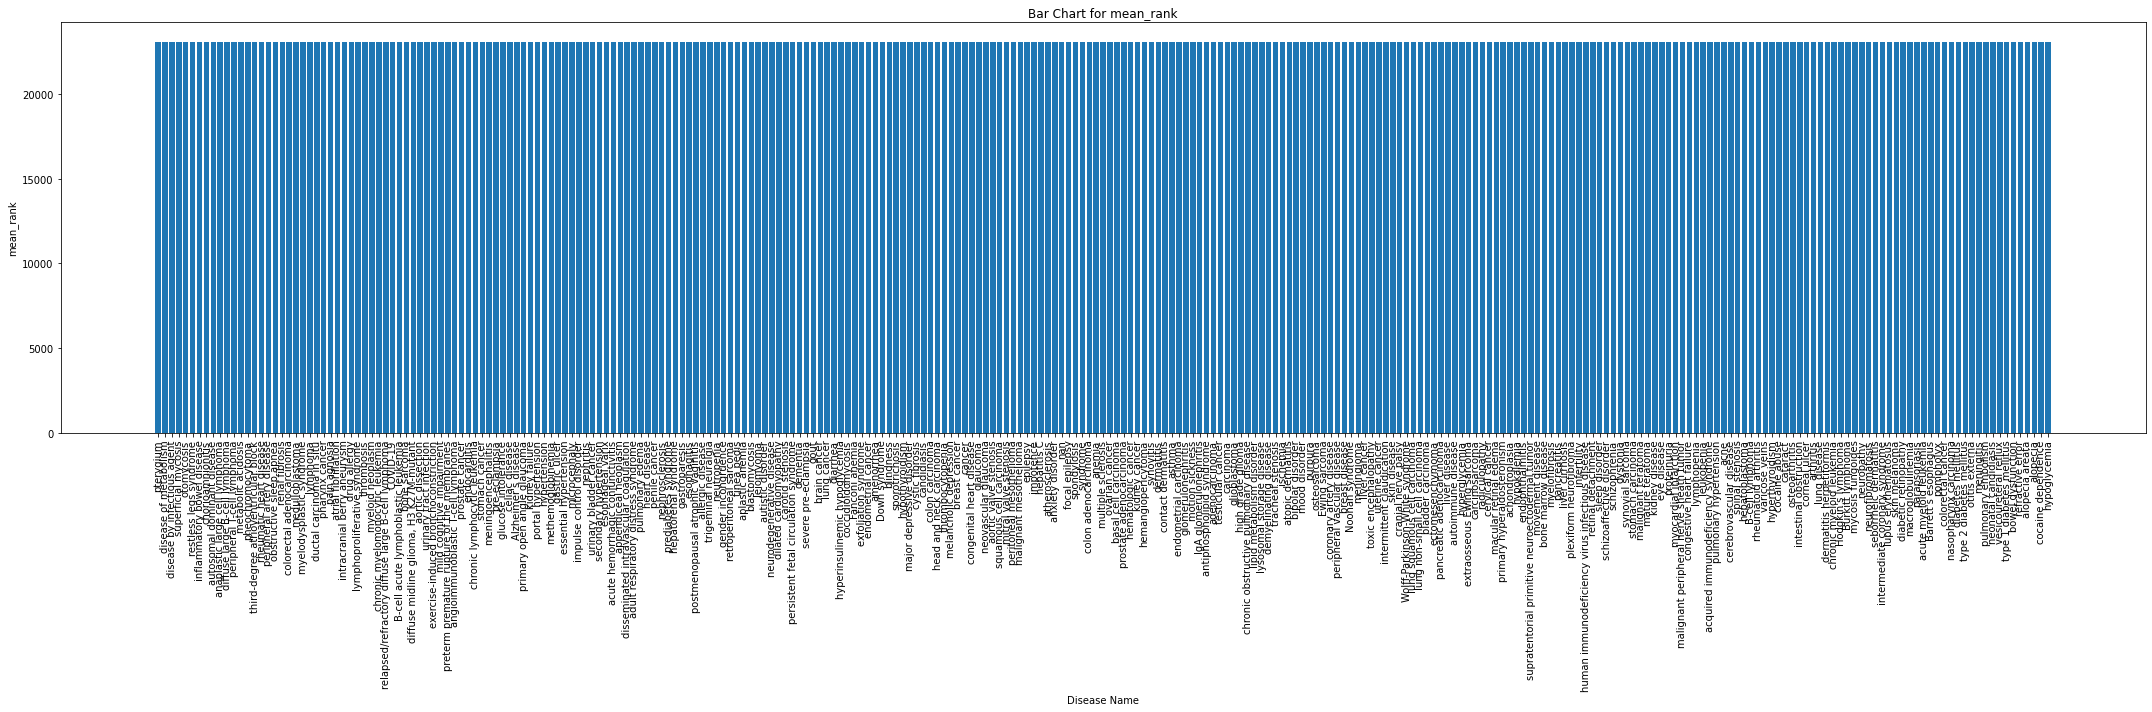

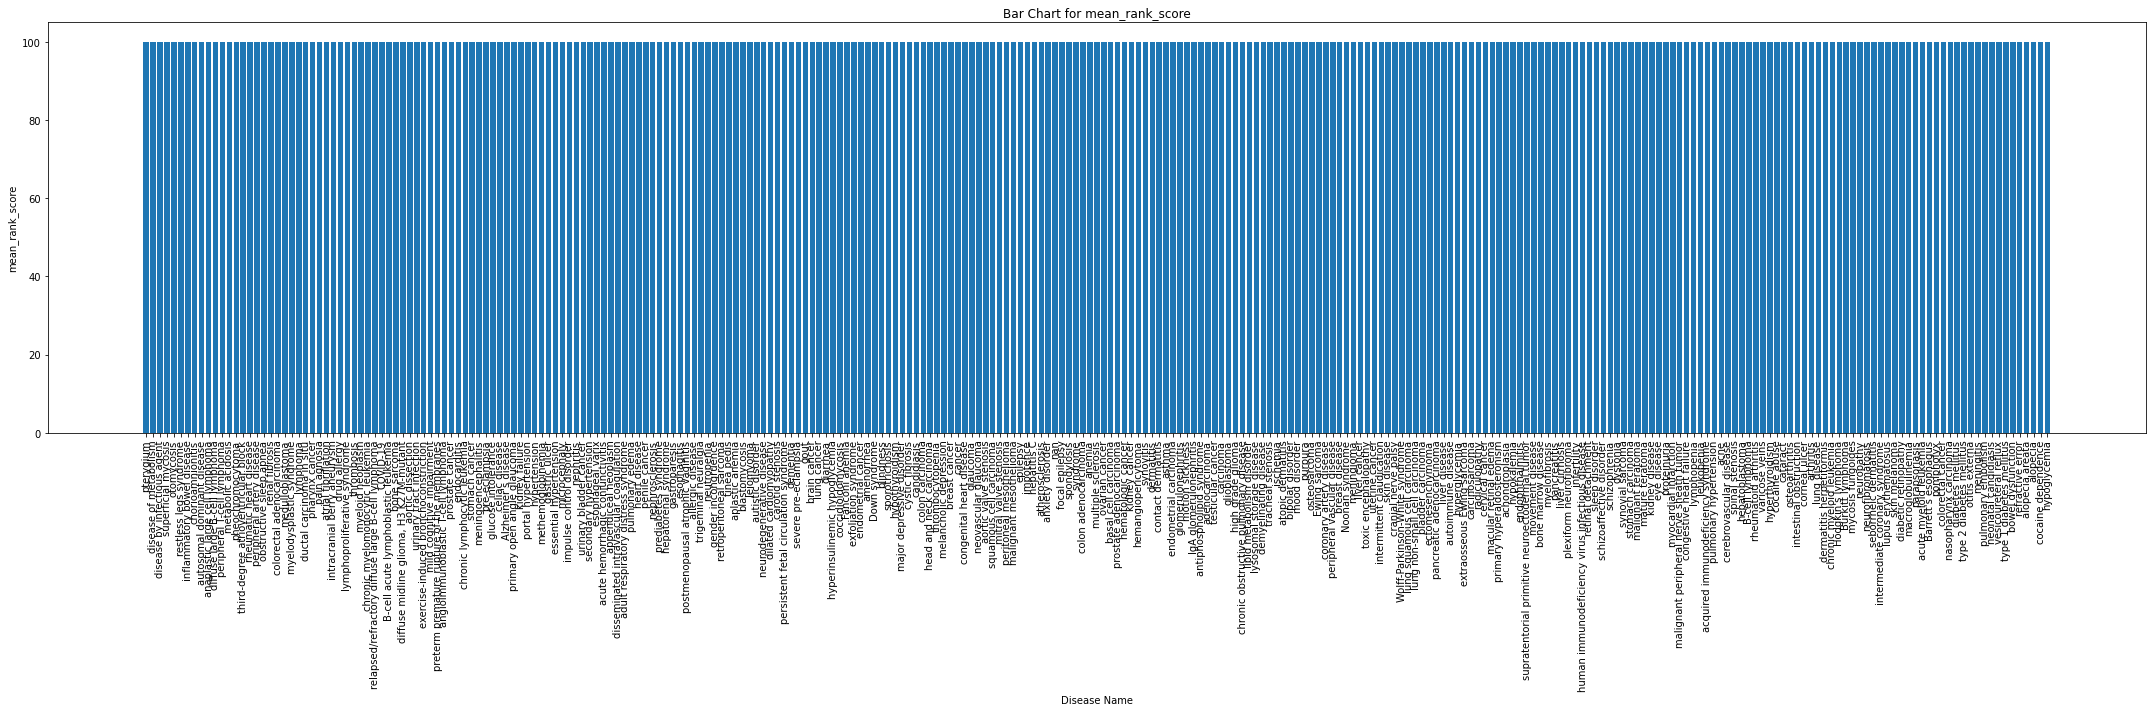

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# List of columns to create bar charts for
columns_to_plot = ['unique_drugs_count', 'nStudy', 'nStudy_Weighted', 'nPub', 'publication_type',
                   't_sum', 'nPub_Weighted', 'nDiseaseMention', 'nDrugMention', 'Rank',
                   'rank_nStudy_Weighted', 'rank_nPub_Weighted', 'rank_nDiseaseMention',
                   'rank_nDrugMention', 'mean_rank', 'mean_rank_score']

# Convert the 'disease_name' column to strings
filtered_df['disease_name'] = filtered_df['disease_name'].astype(str)

# Create bar charts for each column with numeric data
for column in columns_to_plot:
    if pd.api.types.is_numeric_dtype(filtered_df[column]):
        plt.figure(figsize=(30, 10))  # Adjust the figure size as needed
        plt.bar(filtered_df['disease_name'], filtered_df[column])
        plt.xlabel('Disease Name')
        plt.ylabel(column)
        plt.title(f'Bar Chart for {column}')
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()


ValueError: num must be 1 <= num <= 4, not 5

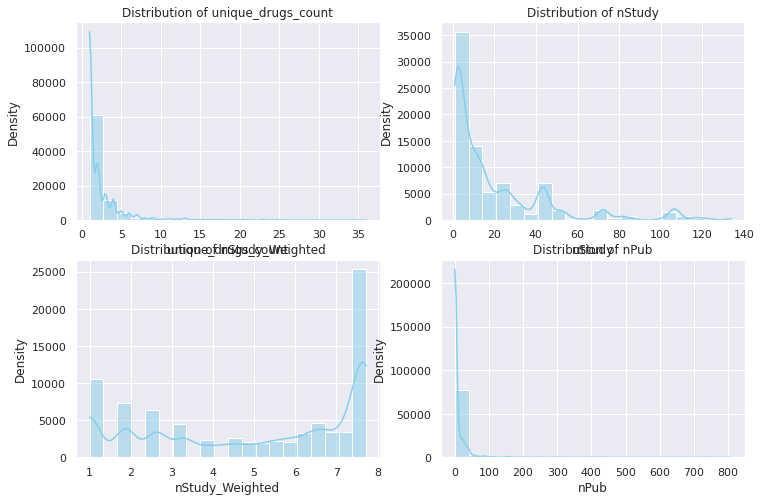

In [4]:
import seaborn as sns

# Set a darkgrid style
sns.set(style="darkgrid")

# Create subplots to display histograms
plt.figure(figsize=(12, 8))

# Plot histograms for each column
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[column], bins=20, kde=True, color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


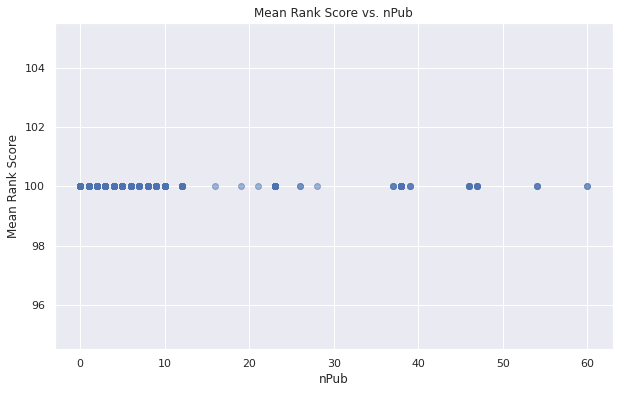

In [5]:
# Scatter plot of mean_rank_score against nPub
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.scatter(filtered_df['nPub'], filtered_df['mean_rank_score'], alpha=0.5)
plt.title('Mean Rank Score vs. nPub')
plt.xlabel('nPub')
plt.ylabel('Mean Rank Score')

# Show the plot
plt.grid(True)
plt.show()

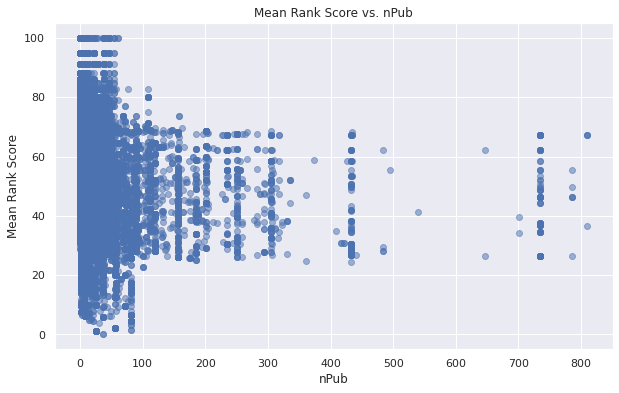

In [6]:
# Scatter plot of mean_rank_score against nPub
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.scatter(df['nPub'], df['mean_rank_score'], alpha=0.5)
plt.title('Mean Rank Score vs. nPub')
plt.xlabel('nPub')
plt.ylabel('Mean Rank Score')

# Show the plot
plt.grid(True)
plt.show()

In [4]:
from sklearn import preprocessing
import pandas as pd

# Sample with columns: 'nStudy', 'nPub', 'nDrugMention'

# Select the columns of interest
columns_of_interest = ['nStudy', 'nPub', 'nDrugMention']
data_to_normalize = df[columns_of_interest]

# Normalize data using Min-Max scaling
min_max_scaler = preprocessing.MinMaxScaler()
normalized_data = min_max_scaler.fit_transform(data_to_normalize)

# Define weights (assign relative importance)
weights = [0.4, 0.3, 0.3]

# Calculate the aggregate scores
df['Aggregate_Score'] = (normalized_data * weights).sum(axis=1)

# Rank alternatives based on aggregate scores
df = df.sort_values(by='Aggregate_Score', ascending=False)

In [5]:
df.columns

Index(['disease_name', 'tcrdTargetName', 'doid', 'gene_symbol',
       'unique_drugs_count', 'disease-target', 'nStudy', 'nStudy_Weighted',
       'nPub', 'publication_type', 't_sum', 'nPub_Weighted', 'nDiseaseMention',
       'nDrugMention', 'Rank', 'rank_nStudy_Weighted', 'rank_nPub_Weighted',
       'rank_nDiseaseMention', 'rank_nDrugMention', 'mean_rank',
       'mean_rank_score', 'Aggregate_Score'],
      dtype='object')

In [6]:
# Define the columns to drop
columns_to_drop = [
    'nStudy_Weighted', 'publication_type', 't_sum', 'nPub_Weighted', 'nDiseaseMention',
    'Rank', 'rank_nStudy_Weighted', 'rank_nPub_Weighted',
    'rank_nDiseaseMention', 'rank_nDrugMention', 'mean_rank', 'mean_rank_score'
]

# Create df2 by dropping the specified columns
df2 = df.drop(columns=columns_to_drop)
df2

disease_name  \
14925                  hypertension   
65118         myocardial infarction   
14744                  hypertension   
14976                  hypertension   
15506                  hypertension   
...                             ...   
12747  chronic lymphocytic leukemia   
12746  chronic lymphocytic leukemia   
58926                achondroplasia   
24900             autistic disorder   
50435       coronary artery disease   

                                        tcrdTargetName        doid  \
14925                              Cytochrome P450 1A2  doid:10763   
65118                           D(4) dopamine receptor   doid:5844   
14744        Multidrug resistance-associated protein 4  doid:10763   
14976                 Epidermal growth factor receptor  doid:10763   
15506     Vasoactive intestinal polypeptide receptor 1  doid:10763   
...                                                ...         ...   
12747  3-hydroxy-3-methylglutaryl-coenzyme A reductase   doid:1040   
12746                             Galactocerebrosidase   doid:1040   
58926                             Substance-K receptor   doid:4480   
24900               Microtubule-associated protein tau  doid:12849   
50435          Receptor tyrosine-protein kinase erbB-4   doid:3393   

      gene_symbol  unique_drugs_count     disease-target  nStudy  nPub  \
14925      CYP1A2                  30  doid:10763-CYP1A2      81   786   
65118        DRD4                  23     doid:5844-DRD4     134   432   
14744       ABCC4                  28   doid:10763-ABCC4      81   647   
14976        EGFR                  24    doid:10763-EGFR      81   734   
15506       VIPR1                  23   doid:10763-VIPR1      81   734   
...           ...                 ...                ...     ...   ...   
12747       HMGCR                   1    doid:1040-HMGCR       1     0   
12746        GALC                   1     doid:1040-GALC       1     0   
58926       TACR2                   1    doid:4480-TACR2       1     0   
24900        MAPT                   1    doid:12849-MAPT       1     0   
50435       ERBB4                   1    doid:3393-ERBB4       1     0   

       nDrugMention  Aggregate_Score  
14925            30         0.780284  
65118            23         0.748571  
14744            28         0.711660  
14976            24         0.709596  
15506            23         0.701025  
...             ...              ...  
12747             1         0.000000  
12746             1         0.000000  
58926             1         0.000000  
24900             1         0.000000  
50435             1         0.000000  

[81821 rows x 10 columns]

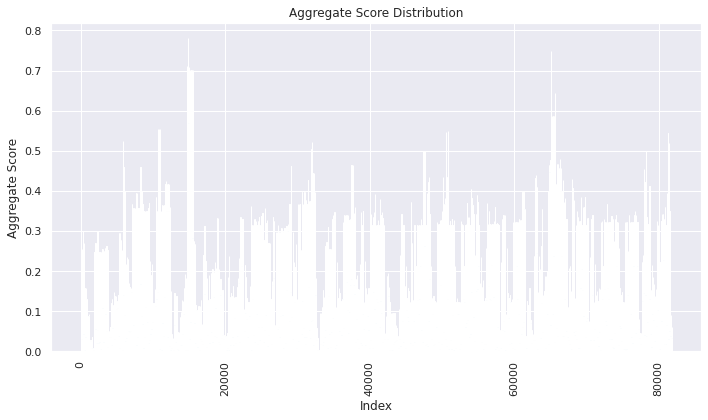

In [11]:
import matplotlib.pyplot as plt
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(df2.index, df2['Aggregate_Score'], color='skyblue')
plt.xlabel('Index')
plt.ylabel('Aggregate Score')
plt.title('Aggregate Score Distribution')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility

# Show the plot
plt.tight_layout()
plt.show()

In [12]:
# Define the lower and upper bounds for Aggregate_Score ranges
lower_bound_1, upper_bound_1 = 0.0, 0.2
lower_bound_2, upper_bound_2 = 0.7, df2['Aggregate_Score'].max()

# Filter disease-targets with Aggregate_Score between 0 - 0.2
filtered_range_1 = df2[(df2['Aggregate_Score'] >= lower_bound_1) & (df2['Aggregate_Score'] <= upper_bound_1)]

# Filter disease-targets with Aggregate_Score between 0.7 and the max value
filtered_range_2 = df2[(df2['Aggregate_Score'] >= lower_bound_2) & (df2['Aggregate_Score'] <= upper_bound_2)]

# Extract the disease-targets from the filtered DataFrames
disease_targets_range_1 = filtered_range_1['disease-target'].tolist()
disease_targets_range_2 = filtered_range_2['disease-target'].tolist()

In [13]:
# List of disease-targets in the subset with Aggregate_Score > 0.7
selected_targets = [
    'doid:10763-CYP1A2', 'doid:5844-DRD4', 'doid:10763-ABCC4', 'doid:10763-EGFR',
    'doid:10763-TACR1', 'doid:10763-NPY2R', 'doid:10763-ESR1', 'doid:10763-ADRB2',
    'doid:10763-CHRM5', 'doid:10763-SIGMAR1', 'doid:10763-VIPR1', 'doid:10763-PDE5A',
    'doid:10763-CXCR2', 'doid:10763-ADRA2A', 'doid:10763-PTAFR', 'doid:10763-CASP1',
    'doid:10763-MC5R', 'doid:10763-AVPR1A', 'doid:10763-CCKAR'
]

# Create a subset of df2 with selected disease-targets
subset_df = df2[df2['disease-target'].isin(selected_targets)]

# Print or use the subset DataFrame as needed
subset_df

disease_name                                tcrdTargetName  \
14925           hypertension                           Cytochrome P450 1A2   
65118  myocardial infarction                        D(4) dopamine receptor   
14744           hypertension     Multidrug resistance-associated protein 4   
14976           hypertension              Epidermal growth factor receptor   
15506           hypertension  Vasoactive intestinal polypeptide receptor 1   
14856           hypertension               Cholecystokinin receptor type A   
15196           hypertension                       Melanocortin receptor 5   
15267           hypertension  cGMP-specific 3',5'-cyclic phosphodiesterase   
15336           hypertension           Platelet-activating factor receptor   
14772           hypertension                  Alpha-2A adrenergic receptor   
15387           hypertension     Sigma non-opioid intracellular receptor 1   
14776           hypertension                    Beta-2 adrenergic receptor   
14806           hypertension                      Vasopressin V1a receptor   
15009           hypertension                             Estrogen receptor   
15448           hypertension                          Substance-P receptor   
14854           hypertension                                     Caspase-1   
15239           hypertension                Neuropeptide Y receptor type 2   
14897           hypertension          Muscarinic acetylcholine receptor M5   
14923           hypertension               C-X-C chemokine receptor type 2   

             doid gene_symbol  unique_drugs_count      disease-target  nStudy  \
14925  doid:10763      CYP1A2                  30   doid:10763-CYP1A2      81   
65118   doid:5844        DRD4                  23      doid:5844-DRD4     134   
14744  doid:10763       ABCC4                  28    doid:10763-ABCC4      81   
14976  doid:10763        EGFR                  24     doid:10763-EGFR      81   
15506  doid:10763       VIPR1                  23    doid:10763-VIPR1      81   
14856  doid:10763       CCKAR                  23    doid:10763-CCKAR      81   
15196  doid:10763        MC5R                  23     doid:10763-MC5R      81   
15267  doid:10763       PDE5A                  23    doid:10763-PDE5A      81   
15336  doid:10763       PTAFR                  23    doid:10763-PTAFR      81   
14772  doid:10763      ADRA2A                  23   doid:10763-ADRA2A      81   
15387  doid:10763     SIGMAR1                  23  doid:10763-SIGMAR1      81   
14776  doid:10763       ADRB2                  23    doid:10763-ADRB2      81   
14806  doid:10763      AVPR1A                  23   doid:10763-AVPR1A      81   
15009  doid:10763        ESR1                  23     doid:10763-ESR1      81   
15448  doid:10763       TACR1                  23    doid:10763-TACR1      81   
14854  doid:10763       CASP1                  23    doid:10763-CASP1      81   
15239  doid:10763       NPY2R                  23    doid:10763-NPY2R      81   
14897  doid:10763       CHRM5                  23    doid:10763-CHRM5      81   
14923  doid:10763       CXCR2                  23    doid:10763-CXCR2      81   

       nPub  nDrugMention  Aggregate_Score  
14925   786            30         0.780284  
65118   432            23         0.748571  
14744   647            28         0.711660  
14976   734            24         0.709596  
15506   734            23         0.701025  
14856   734            23         0.701025  
15196   734            23         0.701025  
15267   734            23         0.701025  
15336   734            23         0.701025  
14772   734            23         0.701025  
15387   734            23         0.701025  
14776   734            23         0.701025  
14806   734            23         0.701025  
15009   734            23         0.701025  
15448   734            23         0.701025  
14854   734            23         0.701025  
15239   734            23         0.701025  
14897   734            2